# **<font color = '#fdcb6e'>Python Workshop:</font> Data Exploration, Matplotlib, and Seaborn**
---

## **<font color = '#fdcb6e'>Group 5:</font> Rosemary, Chhaya, Shaday, Ali**

## <font color = '#fdcb6e'>Dataset:</font> Tips

### <font color = '#fdcb6e'>Context:</font> 
### A male waiter recorded the tips he received over a period of a few months working in one restaurant in Illinois.
### This data is from <font color = '#fdcb6e'>1995</font>, so we need to keep in mind that bill and tip amounts seem lower due to inflation. (minimum wage in Illinois was <font color = '#fdcb6e'>$4.25</font> in 1995).
### Tip culture is different from 1995 and the current year (2023).

### - <font color = '#fdcb6e'>"tip credit"</font> was created by Congress in 1966. Tip credit was given as a percentage of the minimum wage, ranging between 40 and 60 percent until 1996 (a year after this data was recorded.)
### - Congress froze the subminimum wage for tipped workers at $2.13 an hour, $4.03 in 2022 dollars. In 43 states, it's still $2.13 an hour <font color = '#fdcb6e'>26 YEARS LATER</font>!

![](https://blogassets.7shifts.com/2022/10/Tippy-Comic---Knight-asking-for-a-tip.jpg)

---

## Questions: 
   ### - 1. What is the average tip amount (percentage) given by sex?
   ### - 2. Highest total bill per day and the average of total bill per day?
   ### - 3. How does the table size effect the tip percentage?
   ### - 4. Is there a difference between smokers and non-smokers and how much they tip?

In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [43]:
df = sns.load_dataset('tips')

In [6]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### **1. What is the average tip amount (percentage) given by sex? Who tips more? (Females vs. Males)**

In [44]:
# First I need to calculate the total bill and tip and find the percentage.
    # tip percentage = (tip amount / total bill) x 100
# I have to create a new column with the percentage
# Then find the average of those two percentages for females and males.

df['tip_pct'] = (df['tip'] / df['total_bill']) * 100

In [18]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [16]:
df.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.080258
std,8.902412,1.383638,0.951100,6.107220
min,3.070000,1.000000,1.000000,3.563814
25%,13.347500,2.000000,2.000000,12.912736
50%,17.795000,2.900000,2.000000,15.476977
75%,24.127500,3.562500,3.000000,19.147549
max,50.810000,10.000000,6.000000,71.034483


In [22]:
tip_pct_by_sex = df.groupby('sex')['tip_pct'].mean()

In [23]:
tip_pct_by_sex

sex
Male      15.765055
Female    16.649074
Name: tip_pct, dtype: float64

### On average, females tip (16.64%) and males tip (15.76%). Females tip approximately 1% more than males.
### Answer: Females tip more!

Text(0.5, 1.0, 'Average Tip Percentage by Sex')

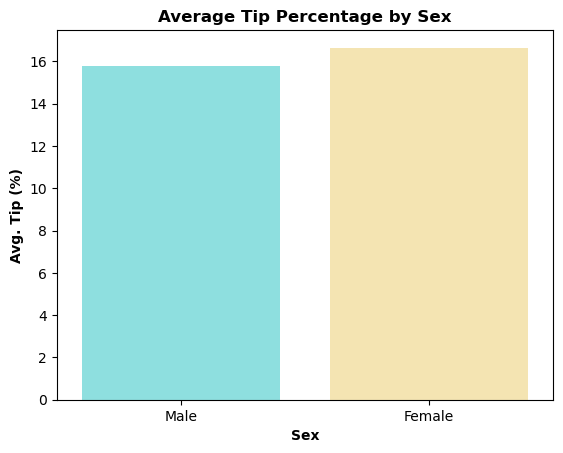

In [36]:
tip_pct_bar = sns.barplot(x = 'sex', y = 'tip_pct', data = df, ci = None, palette = ["#81ecec", "#ffeaa7"])

plt.xlabel('Sex', fontweight = 'bold')
plt.ylabel('Avg. Tip (%)', fontweight = 'bold')
plt.title('Average Tip Percentage by Sex', fontweight = 'bold')

### Curiosity Investigation: What is the maximum tip percentage by sex? 

In [40]:
tip_pct_max_by_sex = df.groupby('sex')['tip_pct'].max()

In [41]:
tip_pct_max_by_sex 

sex
Male      71.034483
Female    41.666667
Name: tip_pct, dtype: float64

### A whopping 71% tip was given by a male customer!
### 41% was given by a female customer. These numbers are high considering the year (1995) and what is expected of us (tip percentage wise) in 2023.

### This made me realize that these max values can influence our average of tip percentages (outliers).

In [48]:
tip_pct_min_by_sex = df.groupby('sex')['tip_pct'].min()

In [49]:
tip_pct_min_by_sex

sex
Male      3.563814
Female    5.643341
Name: tip_pct, dtype: float64

### The lowest average (%) of tips for males was 3.5% and females 5.64%, again, these values can influence the mean as well.